## Gradient decent

This next exercise will use gradient decent to find the minimum of a function f at the learningrates 0.1, 0.01, 0.001 and 0.0001. For each of the learningrate x=1 is set as starting point. The algorithm is run until the magnitude of the gradient falls below 10^-10 or the algorithm has exceeded 10,000 iterations. Finally, the minumun is return and av evaluation is made of which learning rate was the best.

In [2]:
import numpy as np

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams['figure.figsize'] = [9, 7.5]
plt.rcParams['figure.dpi'] = 100 

In [3]:
# first I put my functions in functions so I can call them when calculating x
def derivate_function(x):
    return -(1/2) * np.exp(-(x/2)) + 20*x

def real_function(x):
    return np.exp(-(x/2))+10*x**2

# saving the different learning rates in a list
learningrates = [0.1, 0.01, 0.001, 0.0001]

In [4]:
def grad_dec(learn_rate, max_iter=10000):
    """Function that implemenets gradiant decent"""
    # Initialise x
    x = 1
    step_size = 1
    stop = 10**(-10)

    # making a while loop to go through the
    # Rinning a while looop to optimise the loss function
    curr_iter = 0

    # empty list to store data for plotting
    x_plot = []

    # while derivate_function(x) > 10**(-10) and curr_iter < max_iter:
    while step_size > stop and curr_iter < max_iter:
        prev_x = x
        x = x - learn_rate * derivate_function(x)
        x_plot.append(x)
        step_size = abs(x - prev_x)
        #x += new_x
        curr_iter += 1

    print("Iterations: " + str(curr_iter))
    print("Minimum: " + str(x))

    return x, curr_iter, x_plot

In [5]:
# I will be plotting the gradiant decent with the following function
def plot_grad(x_values, learn_rate):
    """Function that takes k = 0,1,2,3 and plots the tangent to the
    original function."""
    x_values = x_values[:4]

    # plot the function
    x = np.linspace(-1.1, 1.15)
    y = np.exp(-(x/2))+10*x**2
    plt.figure()
    plt.plot(x, y)

    # plotting the points and the tangents
    for i in x_values:
        plt.scatter(i, real_function(i), label=i)
        y_1 = np.exp(-(i/2))+10*i**2

        # plotting the tangents
        x_tan = np.linspace((i - 0.2), (i + 0.2), 10)
        y = derivate_function(i) * (x_tan - i) + real_function(i)
        plt.plot(x_tan, y, "--k")

    plt.title("Gradiant decent with learning rate: " + str(learn_rate))
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()


Learning rate: 0.001
Iterations: 935
Minimum: 0.024693237100521306


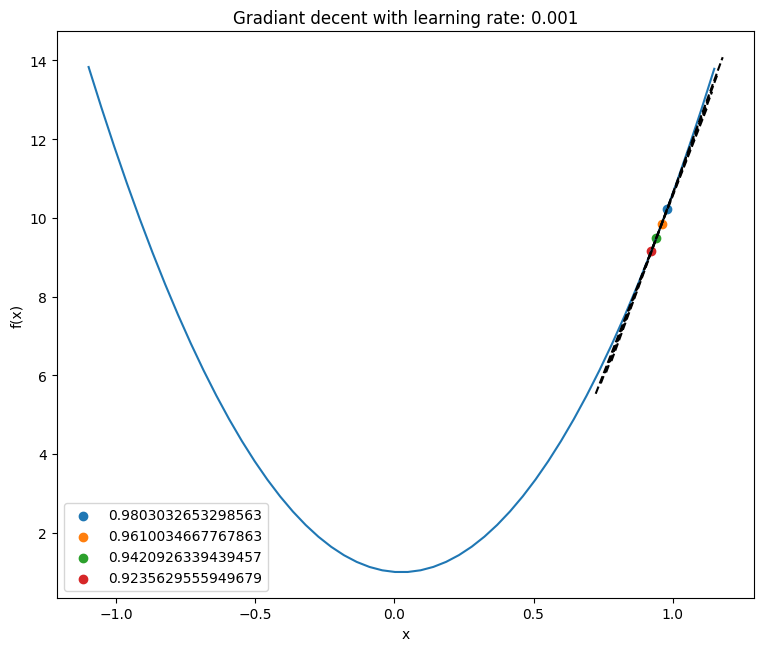

In [7]:
print("\nLearning rate: " + str(learningrates[2]))
x_2, curr_iter_2, x_plot_2 = grad_dec(learningrates[2])

plot_grad(x_plot_2, learningrates[2])  